# Foundations of Neural Networks
Lab Author: Calvin Josenhans

## About
The aim of this lab is to hopefully provide you with a better understanding of the mechanisms at the heart of machine learning and artificial intelligence. We'll build our own learning model from scratch, and use it to ????

# Introduction to Neural Networks

You're probably already familiar with images like the one below.

<img src=".\images\Neural_network_explain.png" alt="A Depiction of an Artificial Neural Network" width="500"/> 


This depicts an artificial neural network, which is one of many models that can be used in a machine learning system (wikipedia). It attempts to model the way that the human brain works, with connections between individual neurons that transmit signals based on a set of trained weights and biases.

## More Neural network explanation
If we zoom in on a single neuron in the network, it looks something like this:

<img src=".\images\neuron.png" alt="A Single Neuron in a neural network" width="500">

You can see that there are a set of inputs that correspond to the outputs of the previous layer, as well an output, which will get sent to all of the neurons in the next layer. You may also notice the values $w_1, ..., w_n$, which are called the weights of the neuron. Every input gets multiplied by that weight before getting summed with the other inputs, which can be thought of representing how 'important' that input is to the neuron.

The function $f$ is known as the neuron's activation function, which converts the sum of all of the inputs to a value in the range $[0, 1]$

# Our Own Neural Network
Let's say that we want to create a simple neural network that can tell us what color a flower will be in a field.

<img src=".\images\Meadow-with-lots-of-yellow-flowers-scaled.jpg" alt="A Depiction of an Artificial Neural Network" width="500"/> 

It turns out that we can solve this problem with the simplest possible neural network, consisting of a single neuron called a **perceptron**.

## Getting Started with Code


In [104]:
from random import random, sample

class Perceptron:
    def __init__(self, num_inputs):
        # Giving the perceptron its learning constant
        # This is a variable that controls how fast the perceptron learns
        self.c = 0.01
        self.weights = list()
        for i in range(num_inputs):
            self.weights.append(random() * 2 - 1)

    def activate(self, n):
        if n < 0: return -1
        return 1

    def feedforward(self, inputs):
        sum = 0
        for i, input in enumerate(inputs):
            sum += input * self.weights[i]

        return self.activate(sum)

## Using Our Perceptron
As our perceptron is, it can already make predictions about what color flowers we will see. Our perceptron will have 3 inputs, the x and y coordinates of the flower, and a bias term.

The bias term may seem strange at first, but it begines to make sense if we think about what happens for the point (0, 0). No matter what the weights of the perceptron are, it will always output 0, which is not very useful. By adding the bias term we are able to account for this issue.

In [105]:
import matplotlib.pyplot as plt

# Plotting Function that We'll Use Later
def plot_results(inputs, outputs):
    xs = [x for (x, y, b) in inputs]
    ys = [y for (x, y, b) in inputs]

    plt.scatter(xs, ys, c=outputs, cmap='viridis')
    plt.show()


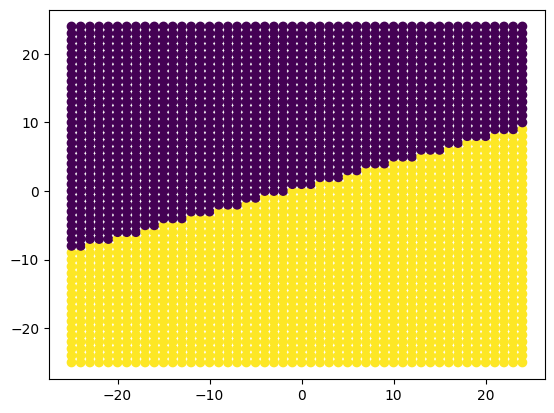

In [106]:
# Creating a perceptron with 3 inputs, an x, y and bias.
perceptron = Perceptron(3)

# There is a flower at every coordinate point
flower_locations = []
for i in range(-25, 25):
    for j in range(-25, 25):
        flower_locations.append([i, j, 1])


flower_colors = []
for loc in flower_locations:
    prediction = perceptron.feedforward(loc)
    flower_colors.append(prediction)
    # if prediction == -1:
    #     flower_colors.append("red")
    # else:
    #     flower_colors.append("blue")

plot_results(flower_locations, flower_colors)


## Our Graph
Notice the linear boundary between the two colors of flowers. This is because our network only has 1 neuron (so technically it isn't a network at all!). Increasing the size of our network allows for handling more complex data as we'll see later.

# Training

Right now, our perceptron is simply guessing at a distribution of flowers. The real power comes with the ability to train the perceptron based on just a few datapoints, to learn the pattern of data distribution.

## A training algorithm
1. Provide the perceptron with inputs where there is a known answer. 
2. Ask the perceptron to guess an answer for those inputs.
3. Compute the error - i.e. how close to the correct answer was the perceptron.
4. Adjust the weights based on the error.
5. Repeat!

When we provide enough trading data, this process allows us to fine-tune the perceptron's weights to predict as accurately as possible the locations of flowers.

## Translating this algorithm into code

In [107]:
# Another method for the perceptron class
def train(self: Perceptron, inputs, answer):
    guess = self.feedforward(inputs)
    error = guess - answer

    for i in range(len(self.weights)):
        self.weights[i] += self.c * error * inputs[i]


# Assigning the method to the class
Perceptron.train = train



## Actually Training
We already generated some data for our flowers, so lets just choose a few random points out of those to be our training sets: `flower_locations` (inputs) and `flower_colors` (outputs).

In [108]:
# The "true" distribution of the flowers
def f(x):
    return 2*x + 1

# Select a random portion of the points we have.
inputs = sample(flower_locations, 400)
outputs = [f(i[0]) for i in inputs]

# Training our perceptron
for i in range(len(inputs)):
    perceptron.train(inputs[i], outputs[i])

# Testing how we did
Let's compare the predictions of our perceptron to the line y=2x + 1 that represents the actual distribution we're aiming for.

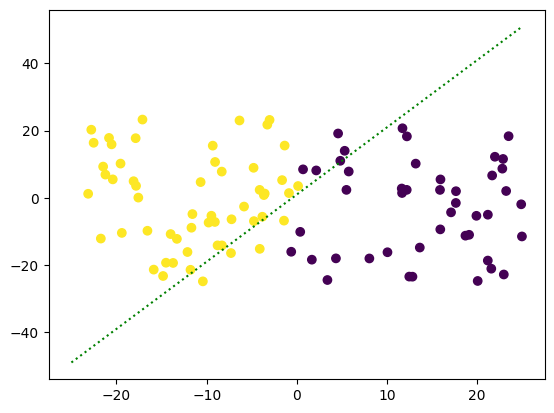

In [109]:

xs = []
ys = []
outputs = []
# Guessing the color of a bunch of random flowers
for i in range(100):
    x = random() * 50 - 25
    y = random() * 50 - 25

    xs.append(x)
    ys.append(y)
    outputs.append(perceptron.feedforward([x, y, 1]))


plt.scatter(xs, ys, c=outputs,cmap='viridis')

plt.plot([-25, 25], [f(-25), f(25)], color='green', marker='', linestyle='dotted')

plt.show()



# Sources
- https://natureofcode.com/book/chapter-10-neural-networks/
- https://en.wikipedia.org/wiki/Machine_learning#Model_assessments